In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-05-21 11:05:15	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-05-21 11:05:15	Parsing datapackage to create a Study object
2016-05-21 11:06:06 	Initializing Study
2016-05-21 11:06:06 	Initializing Predictor configuration manager for Study
2016-05-21 11:06:06	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-05-21 11:06:06	Added ExtraTreesClassifier to default predictors
2016-05-21 11:06:06	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-05-21 11:06:06	Added ExtraTreesRegressor to default predictors
2016-05-21 11:06:06	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-05-21 11:06:06	Added GradientBoostingClassifier to default predictors
2016-05-21 11:06:06	Predictor GradientBoostingRegressor is of type <class 'sklear

In [2]:
folder = 'figures'
! mkdir $folder

mkdir: cannot create directory `figures': File exists


In [3]:
event = 'exon:chr10:1043148-1043248:+@exon:chr10:1044943-1045035:+@exon:chr10:1046617-1046808:+'

event in study.splicing.data

False

In [4]:
modalities_counts = study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).count().reset_index()
modalities_counts = modalities_counts.rename(columns={'event_id': '# AS events'})
modalities_counts.head()

,phenotype,modality,# AS events
0,MN,bimodal,1316
1,MN,excluded,1175
2,MN,included,2995
3,MN,uncategorized,2
4,NPC,bimodal,2325


In [5]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

modalities_counts_2d = modalities_counts.pivot(index='phenotype', columns='modality', values='# AS events')
modalities_counts_2d = modalities_counts_2d.reindex(columns=MODALITY_ORDER, index=study.phenotype_order)
modalities_counts_2d = modalities_counts_2d.T
modalities_counts_2d

In [7]:
modalities_counts_2d = modalities_counts_2d.fillna(0)
modalities_counts_2d

phenotype,iPSC,NPC,MN
modality,,,
excluded,2293,1732,1175
bimodal,3438,2325,1316
included,6105,4597,2995
middle,1,0,0
uncategorized,34,4,2


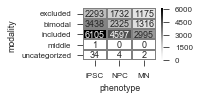

In [8]:
sns.set(style='ticks', context='paper')
fig, ax= plt.subplots(figsize=(2.75, 1.5))
mask = modalities_counts_2d.isnull()
sns.heatmap(modalities_counts_2d, annot=True, mask=mask, fmt='g', annot_kws=dict(size=9), 
            cmap='Greys', linewidth=1, linecolor='grey')
fig.tight_layout()
fig.savefig('{}/modalities_counts_heatmap.pdf'.format(folder))

In [9]:
modalities_counts['percentage'] = 100*modalities_counts.groupby('phenotype')['# AS events'].apply(lambda x: x/x.sum())
modalities_counts

,phenotype,modality,# AS events,percentage
0,MN,bimodal,1316,23.979592
1,MN,excluded,1175,21.410350
2,MN,included,2995,54.573615
3,MN,uncategorized,2,0.036443
4,NPC,bimodal,2325,26.853777
5,NPC,excluded,1732,20.004620
6,NPC,included,4597,53.095403
7,NPC,uncategorized,4,0.046200
8,iPSC,bimodal,3438,28.961334
9,iPSC,excluded,2293,19.315980


In [10]:
from anchor import MODALITY_ORDER, MODALITY_PALETTE, MODALITY_TO_COLOR

## Barplots

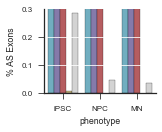

In [30]:

fig, ax = plt.subplots(figsize=(2, 1.5))

# ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order, zorder=-1)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
ax.set(ylabel='% AS Exons')
ax.grid(axis='y', color='white', zorder=100)
sns.despine()
fig.savefig('{}/modalities_barplot.pdf'.format(folder))

ax.set(ylim=(0, 0.3))
# ax.grid(axis='y', color='grey', zorder=np.inf)
fig.savefig('{}/modalities_barplot_zoom.pdf'.format(folder))

# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax, bottom=True)
# ax.tick_params(axis='x', bottom='off')
# ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

# ax = axes[1]
# sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
#            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
# ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
#        xlabel='')
# ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
# sns.despine(ax=ax)
# # fig.tight_layout()
# fig.savefig('{}/modalities_barplot.pdf'.format(folder))

array(['mRNA splice site selection', 'mRNA splicing, via spliceosome',
       'negative regulation of mRNA splicing, via spliceosome',
       'RNA splicing, via transesterification reactions',
       'assembly of spliceosomal tri-snRNP', 'RNA splicing',
       'spliceosomal complex assembly',
       'tRNA splicing, via endonucleolytic cleavage and ligation',
       'regulation of RNA splicing',
       'regulation of alternative mRNA splicing, via spliceosome',
       'regulation of mRNA splicing, via spliceosome',
       'spliceosomal complex', 'U12-type spliceosomal complex',
       'catalytic step 2 spliceosome',
       'positive regulation of mRNA splicing, via spliceosome',
       'cis assembly of pre-catalytic spliceosome',
       'spliceosomal snRNP assembly', 'mRNA cis splicing, via spliceosome',
       'negative regulation of RNA splicing',
       'tRNA-splicing ligase complex', 'intein-mediated protein splicing',
       "mRNA 3'-splice site recognition", 'U2-type spliceosomal 

### Split axes barplot

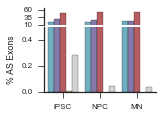

In [12]:

fig, axes = plt.subplots(nrows=2, sharex=True, figsize=(2, 1.5), 
                         gridspec_kw=dict(hspace=0.05, height_ratios=[0.2, 0.8]))

ax = axes[0]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
            hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax, bottom=True)
ax.tick_params(axis='x', bottom='off')
ax.set(xticks=[], xlabel='', ylim=(10, 65), ylabel='', yticks=[10, 35, 60])

ax = axes[1]
sns.barplot(x='phenotype', hue='modality', y='percentage', data=modalities_counts, ax=ax,
           hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE, x_order=study.phenotype_order)
ax.set(ylim=(0, 0.5), ylabel='% AS Exons', 
       xlabel='')
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine(ax=ax)
# fig.tight_layout()
fig.savefig('{}/modalities_barplot_split_axes.pdf'.format(folder))

## Venn diagrams

In [ ]:
import matplotlib_venn

sns.set(context='paper', style='ticks')

from anchor import MODALITY_ORDER

study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']).size()

In [13]:
sns.palplot(sns.light_palette(MODALITY_PALETTE[0], n_colors=3))

In [18]:
from anchor import MODALITY_TO_CMAP

fig, axes = plt.subplots(figsize=(3, 3), nrows=2, ncols=2)

axes_iter = axes.flat

grouped_modality = study.supplemental.modalities_tidy.groupby('modality')

for modality in MODALITY_ORDER:
    modality_df = grouped_modality.get_group(modality)
    if modality == 'middle':
        continue
    grouped_phenotype = modality_df.groupby('phenotype')
    sets = [set(grouped_phenotype.get_group(phenotype)['event_id']) for phenotype in study.phenotype_order]
    
    ax = axes_iter.next()
    cmap = MODALITY_TO_CMAP[modality]

    set_colors = cmap(np.linspace(0, 1, 4))[1:]

#     set_colors = sns.light_palette(MODALITY_TO_COLOR[modality], n_colors=3)
#     set_colors = study.phenotype_color_ordered
    matplotlib_venn.venn3(sets, set_labels=study.phenotype_order, set_colors=set_colors, ax=ax)
#     ax.set(title=modality)
fig.tight_layout()
fig.savefig('{}/venn_diagrams.pdf'.format(folder))